# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Load in a Binaural Recording</h1>

Set up where the data is located. In this case, we'll use the sample recordings located under the `Field Rec` folder.

In [1]:
from pathlib import Path
wav_folder = Path().cwd().joinpath("Field Rec")

Ensuring that Soundscapy knows exactly how loud your recordings were onsite is crucial to getting correct answers. If you used equipment such as the Head Acoustics SqoBold, and were careful about how the recordings are exported to .wav, then they may already be correctly adjusted (as ours are here). However its best to be safe and calibrate each signal to their real-world dB level. To do this, we load in a .json that contains the per-channel correct dB $L_{eq}$ level.

In [2]:
import json

levels = wav_folder.joinpath("Levels.json")

with open("Field Rec/Levels.json") as f:
    levels= json.load(f)

list(levels.items())

[('1m', {'Left': 62.573, 'Right': 62.573}),
 ('2m', {'Left': 58.27, 'Right': 58.27}),
 ('3m', {'Left': 55.83, 'Right': 55.83}),
 ('5m', {'Left': 53.93, 'Right': 53.93}),
 ('10m', {'Left': 50.43, 'Right': 50.43}),
 ('15m', {'Left': 50.13, 'Right': 50.13})]

Load in a binaural wav signal. We can use the `plot` function provided by the `acoustics.Signal` super-class.

In [3]:
from soundscapy import Binaural

# Loading (you can load any wave under the Field Rec folder. We Chose "10m.wav")
binaural_wav = wav_folder.joinpath("10m.wav")
b = Binaural.from_wav(binaural_wav)

# Calibration
decibel = (levels[b.recording]["Left"], levels[b.recording]["Left"])

b = Binaural.from_wav(binaural_wav, calibrate_to=decibel)

c:\Users\fspintern1\AppData\Local\Programs\Python\Python311\Lib\site-packages\acoustics\_signal.py:1048: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Run All Soundscapy Tests</h1>

In [6]:
# import pandas as pd

# # Set display options
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.width', None)        # Set width to fit the entire DataFrame

# from soundscapy import AnalysisSettings
# from soundscapy.analysis.binaural import prep_multiindex_df, add_results, process_all_metrics

    
# df = prep_multiindex_df(levels, incl_metric=False)
# ex_settings = AnalysisSettings.from_yaml(Path("ex_settings.yaml"))

# df = b.pyacoustics_metric("LAeq", analysis_settings = ex_settings)
# df = add_results(df, b.mosqito_metric("loudness_zwtv", analysis_settings = ex_settings))
# df = add_results(df, b.mosqito_metric("sharpness_din_from_loudness", analysis_settings = ex_settings))
# df = add_results(df, b.mosqito_metric("roughness_dw", analysis_settings = ex_settings))
# df 

# imports
import json
import pandas as pd
from tqdm import tqdm
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Set width to fit the entire DataFrame

from soundscapy import Binaural
from soundscapy import AnalysisSettings
from soundscapy.analysis.binaural import prep_multiindex_df, add_results, process_all_metrics

wav_folder = Path().cwd().joinpath("Field Rec")
levels = wav_folder.joinpath("Levels.json")

with open(levels) as f:
    levels = json.load(f)
    
df = prep_multiindex_df(levels, incl_metric=False)

ex_settings = AnalysisSettings.from_yaml(Path("ex_settings.yaml"))
# analysis_settings = AnalysisSettings.default()
# analysis_settings["MoSQITo"]["sharpness_din_from_loudness"]["run"] = False
# analysis_settings["MoSQITo"]["sharpness_din_perseg"]["run"] = False
# analysis_settings["MoSQITo"]["roughness_dw"]["run"] = False

#df = b.process_all_metrics(analysis_settings, verbose=True)

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):
    recording = wav.stem
    pbar.set_description(f"Processing {recording}")
    decibel = tuple(levels[recording].values())
    b = Binaural.from_wav(wav, calibrate_to=decibel)
    df = add_results(df, b.process_all_metrics(ex_settings, verbose=False, parallel=True)) # Process all metrics and add to results df

Processing 10m:   0%|          | 0/6 [00:00<?, ?it/s]

c:\Users\fspintern1\AppData\Local\Programs\Python\Python311\Lib\site-packages\acoustics\_signal.py:1048: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


<h1 style="color:orange ; font-weight: bold; font-style: italic;">Save the File as an Excel File</h1>

In [ ]:
from datetime import datetime
df.to_excel(wav_folder.parent.joinpath("", f"AllTest_{datetime.today().strftime('%Y-%m-%d')}.xlsx"))

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Binaural Graph</h1>

<Axes: title={'center': 'Binaural - 10m.wav'}, xlabel='$t$ in s', ylabel='$x$ in -'>

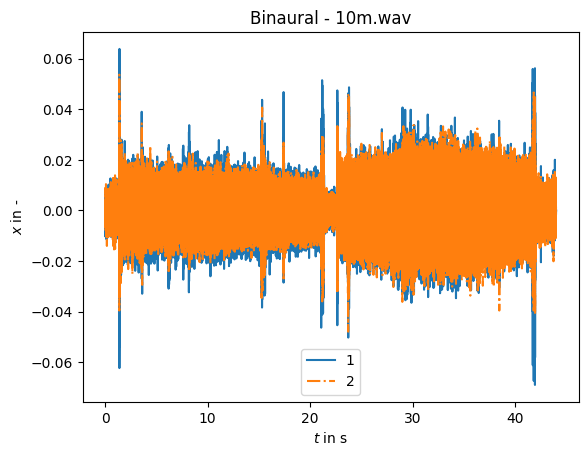

In [6]:
# Plotting
b.plot(title='Binaural - ' + binaural_wav.name)

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Mel-Frequency Spectrogram</h1>

[Text(0.5, 1.0, 'Mel-frequency spectrogram - 10m.wav')]

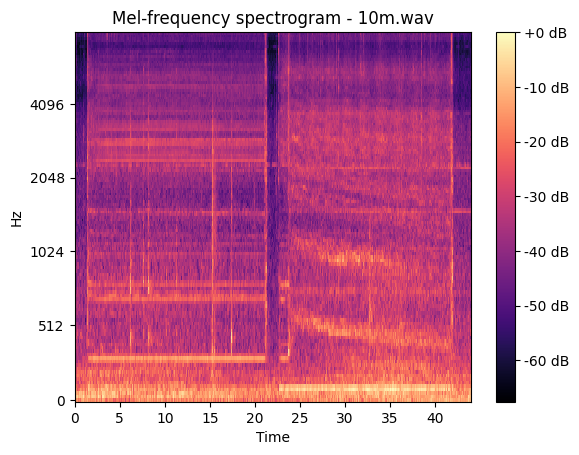

In [7]:
import librosa
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loading (you can load any wave under the Field Rec folder. We Chose "10m.wav")
binaural_wav = wav_folder.joinpath("10m.wav")
   
y, sr = librosa.load(binaural_wav)
librosa.feature.melspectrogram(y=y, sr=sr)


D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram - ' + binaural_wav.name)

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Magnitude for Specific Frequencies</h1>

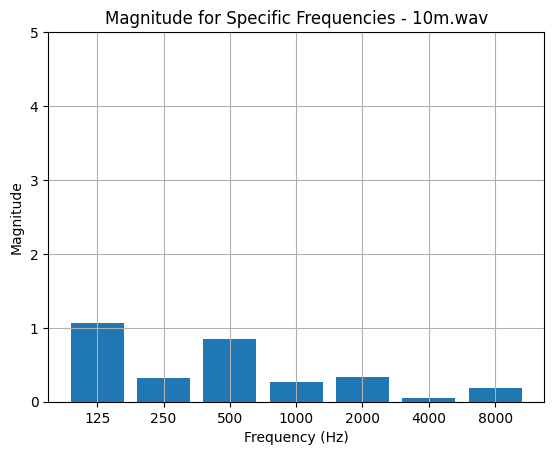

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


sound_data, sampling_rate = librosa.load(binaural_wav, sr=None)
# Calculate the FFT magnitude
fft_magnitude = np.abs(np.fft.fft(sound_data))

# Frequencies of interest
frequencies = [125, 250, 500, 1000, 2000, 4000, 8000]

# Find the indices corresponding to the frequencies of interest
indices = []
for freq in frequencies:
    index = int(freq * len(fft_magnitude) / sampling_rate)
    indices.append(index)

# Extract the magnitudes for the frequencies of interest
magnitudes = fft_magnitude[indices]

# Plot a bar chart of the magnitudes
plt.bar(np.arange(len(frequencies)), magnitudes)
plt.xticks(np.arange(len(frequencies)), frequencies)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 5)
plt.title('Magnitude for Specific Frequencies - ' + binaural_wav.name)
plt.grid(True)
plt.show()


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Loading Questionnaire Answers (PAQs)</h1>

In [1]:
import soundscapy
import pandas as pd
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Set width to fit the entire DataFrame

df1 = pd.read_excel("Book1.xlsx", sheet_name="Sheet1")
df1

,Participint,Age,RecordID,GroupID,SessionID,Gender,LocationID,Date,Time,pleasant,chaotic,vibrant,uneventful,calm,annoying,eventful,monotonous
0,Max,28.0,1,1,1,M,R1c,2023-07-19,09:40:00,5,1,1,5,5,1,1,2
1,Max,28.0,2,1,1,M,R1m,2023-07-19,09:44:00,1,1,1,3,1,4,2,5
2,Max,28.0,3,1,1,M,R1o,2023-07-19,09:46:00,5,1,1,5,5,1,1,3
3,Amanda,33.0,4,1,1,F,R1c,2023-07-19,09:55:00,3,2,1,4,4,1,1,4
4,Amanda,33.0,5,1,1,F,R1m,2023-07-19,09:58:00,1,4,2,1,1,5,4,1
5,Amanda,33.0,6,1,1,F,R1o,2023-07-19,10:00:00,4,1,1,4,4,1,3,4
6,Maraile,NaN,7,1,1,F,R1c,2023-07-19,10:08:00,4,1,3,3,4,1,3,2
7,Maraile,NaN,8,1,1,F,R1m,2023-07-19,10:10:00,2,3,2,3,1,4,3,3
8,Maraile,NaN,9,1,1,F,R1o,2023-07-19,10:12:00,4,1,3,2,4,1,3,2


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Validating the Dataset</h1>

In [2]:
# 'df' will contain the validated DataFrame
# 'excl' will contain any excluded data or information returned by the method

df, excl = df1.isd.validate_dataset()
df

Renaming PAQ columns.
Checking PAQ data quality.
PAQ quality confirmed. No rows dropped.


,Participint,Age,RecordID,GroupID,SessionID,Gender,LocationID,Date,Time,PAQ1,PAQ4,PAQ2,PAQ7,PAQ8,PAQ5,PAQ3,PAQ6
0,Max,28.0,1,1,1,M,R1c,2023-07-19,09:40:00,5,1,1,5,5,1,1,2
1,Max,28.0,2,1,1,M,R1m,2023-07-19,09:44:00,1,1,1,3,1,4,2,5
2,Max,28.0,3,1,1,M,R1o,2023-07-19,09:46:00,5,1,1,5,5,1,1,3
3,Amanda,33.0,4,1,1,F,R1c,2023-07-19,09:55:00,3,2,1,4,4,1,1,4
4,Amanda,33.0,5,1,1,F,R1m,2023-07-19,09:58:00,1,4,2,1,1,5,4,1
5,Amanda,33.0,6,1,1,F,R1o,2023-07-19,10:00:00,4,1,1,4,4,1,3,4
6,Maraile,NaN,7,1,1,F,R1c,2023-07-19,10:08:00,4,1,3,3,4,1,3,2
7,Maraile,NaN,8,1,1,F,R1m,2023-07-19,10:10:00,2,3,2,3,1,4,3,3
8,Maraile,NaN,9,1,1,F,R1o,2023-07-19,10:12:00,4,1,3,2,4,1,3,2


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Calculating the ISOPleasant and ISOEventful Coordinate Values</h1>

In [3]:
df = df.sspy.return_paqs()
df

,RecordID,GroupID,SessionID,LocationID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8
0,1,1,1,R1c,5,1,1,1,1,2,5,5
1,2,1,1,R1m,1,1,2,1,4,5,3,1
2,3,1,1,R1o,5,1,1,1,1,3,5,5
3,4,1,1,R1c,3,1,1,2,1,4,4,4
4,5,1,1,R1m,1,2,4,4,5,1,1,1
5,6,1,1,R1o,4,1,3,1,1,4,4,4
6,7,1,1,R1c,4,3,3,1,1,2,3,4
7,8,1,1,R1m,2,2,3,3,4,3,3,1
8,9,1,1,R1o,4,3,3,1,1,2,2,4


In [4]:
df = df.sspy.add_paq_coords()
df

,RecordID,GroupID,SessionID,LocationID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,1,1,1,R1c,5,1,1,1,1,2,5,5,0.633883,-0.780330
1,2,1,1,R1m,1,1,2,1,4,5,3,1,-0.603553,-0.396447
2,3,1,1,R1o,5,1,1,1,1,3,5,5,0.560660,-0.853553
3,4,1,1,R1c,3,1,1,2,1,4,4,4,0.133883,-0.676777
4,5,1,1,R1m,1,2,4,4,5,1,1,1,-0.560660,0.603553
5,6,1,1,R1o,4,1,3,1,1,4,4,4,0.310660,-0.542893
6,7,1,1,R1c,4,3,3,1,1,2,3,4,0.603553,-0.146447
7,8,1,1,R1m,2,2,3,3,4,3,3,1,-0.426777,0.073223
8,9,1,1,R1o,4,3,3,1,1,2,2,4,0.603553,-0.042893


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plotting</h1>

<h3 style="color:white ; font-weight: bold; font-style: italic;">A: Plotting Functions for Visualising Circumplex Data</h3>

## <h2 style="color:#FFA500 ; font-weight: bold; font-style: italic;">1) Scatter Plots</h2>

<Axes: title={'center': 'All Location'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

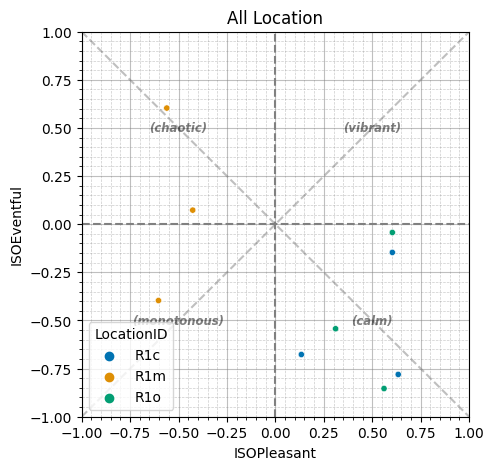

In [5]:
df.sspy.scatter(hue='LocationID', s=20, title='All Location', diagonal_lines=True)

<h2 style="color:#FFA500 ; font-weight: bold; font-style: italic;">2) Distribution (Density) Plots</h2>

The real power of `Soundscapy` is in creating plots of the distribution of soundscape assessments. The interface for doing this is the same as the scatter plots above.

As we said, this is particularly useful for comparing different soundscapes. So let's see how we can plot three different soundscapes at once.

<Axes: title={'center': 'Comparison of the Soundscapes of Three Locations\n'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

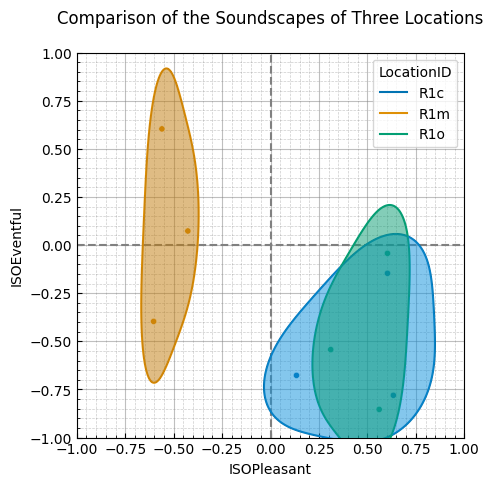

In [6]:
df.isd.filter_location_ids(["R1c", "R1o", "R1m"]).sspy.density(
    title="Comparison of the Soundscapes of Three Locations\n",
    hue="LocationID",
    density_type="simple",
    incl_scatter=True,
    #palette="husl",
)

<h2 style="color:#FFA500 ; font-weight: bold; font-style: italic;">3) Jointplot</h2>

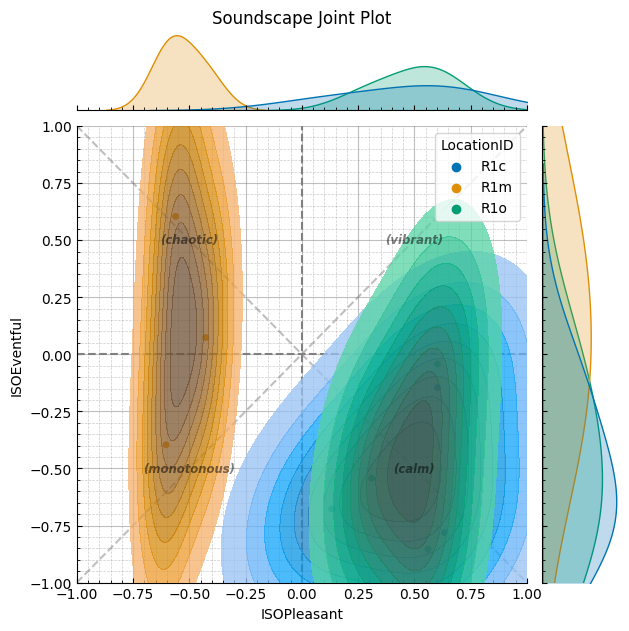

In [7]:
df.isd.filter_location_ids(["R1c", "R1m", "R1o"]).sspy.jointplot(hue="LocationID", diagonal_lines=True, marginal_kind="kde", density_type="full")

<h3 style="color:white ; font-weight: bold; font-style: italic;">B: Plotting Functions for Visualising Likert Scale Data</h3>


#### Generate a radar/spider plot of PAQ values using paq_radar_plot function


<PolarAxes: >

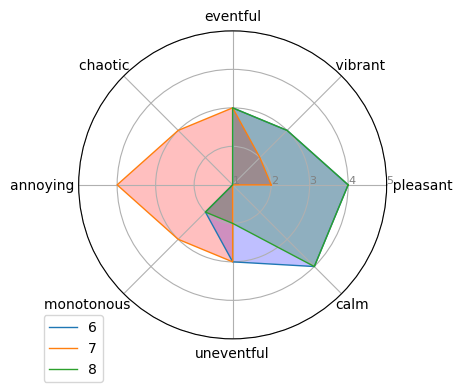

In [8]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))
plt.rcParams["figure.dpi"] = 350
df1.isd.filter_location_ids(["R1c", "R1m", "R1o"]).tail(3).sspy.paq_radar()

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Statistical Analysis of the ISD Dataset</h1>

In [9]:
results = df.isd.soundscapy_describe()
results

,count,ISOPleasant,ISOEventful,pleasant,eventful,vibrant,chaotic,monotonous,calm
R1c,3,0.457,-0.535,1.0,0.000,0.0,0.000,0.000,1.0
R1m,3,-0.530,0.093,0.0,0.667,0.0,0.667,0.333,0.0
R1o,3,0.492,-0.480,1.0,0.000,0.0,0.000,0.000,1.0


In [10]:
df.describe()

,RecordID,GroupID,SessionID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
count,9.000000,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,1.0,1.0,3.222222,1.666667,2.333333,1.666667,2.111111,2.888889,3.333333,3.222222,0.139467,-0.306951
std,2.738613,0.0,0.0,1.563472,0.866025,1.118034,1.118034,1.691482,1.269296,1.322876,1.715938,0.529721,0.473333
min,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.603553,-0.853553
25%,3.000000,1.0,1.0,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,-0.426777,-0.676777
50%,5.000000,1.0,1.0,4.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,4.000000,0.310660,-0.396447
75%,7.000000,1.0,1.0,4.000000,2.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,0.603553,-0.042893
max,9.000000,1.0,1.0,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.633883,0.603553


<Axes: title={'center': 'Soundscape Scatter Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

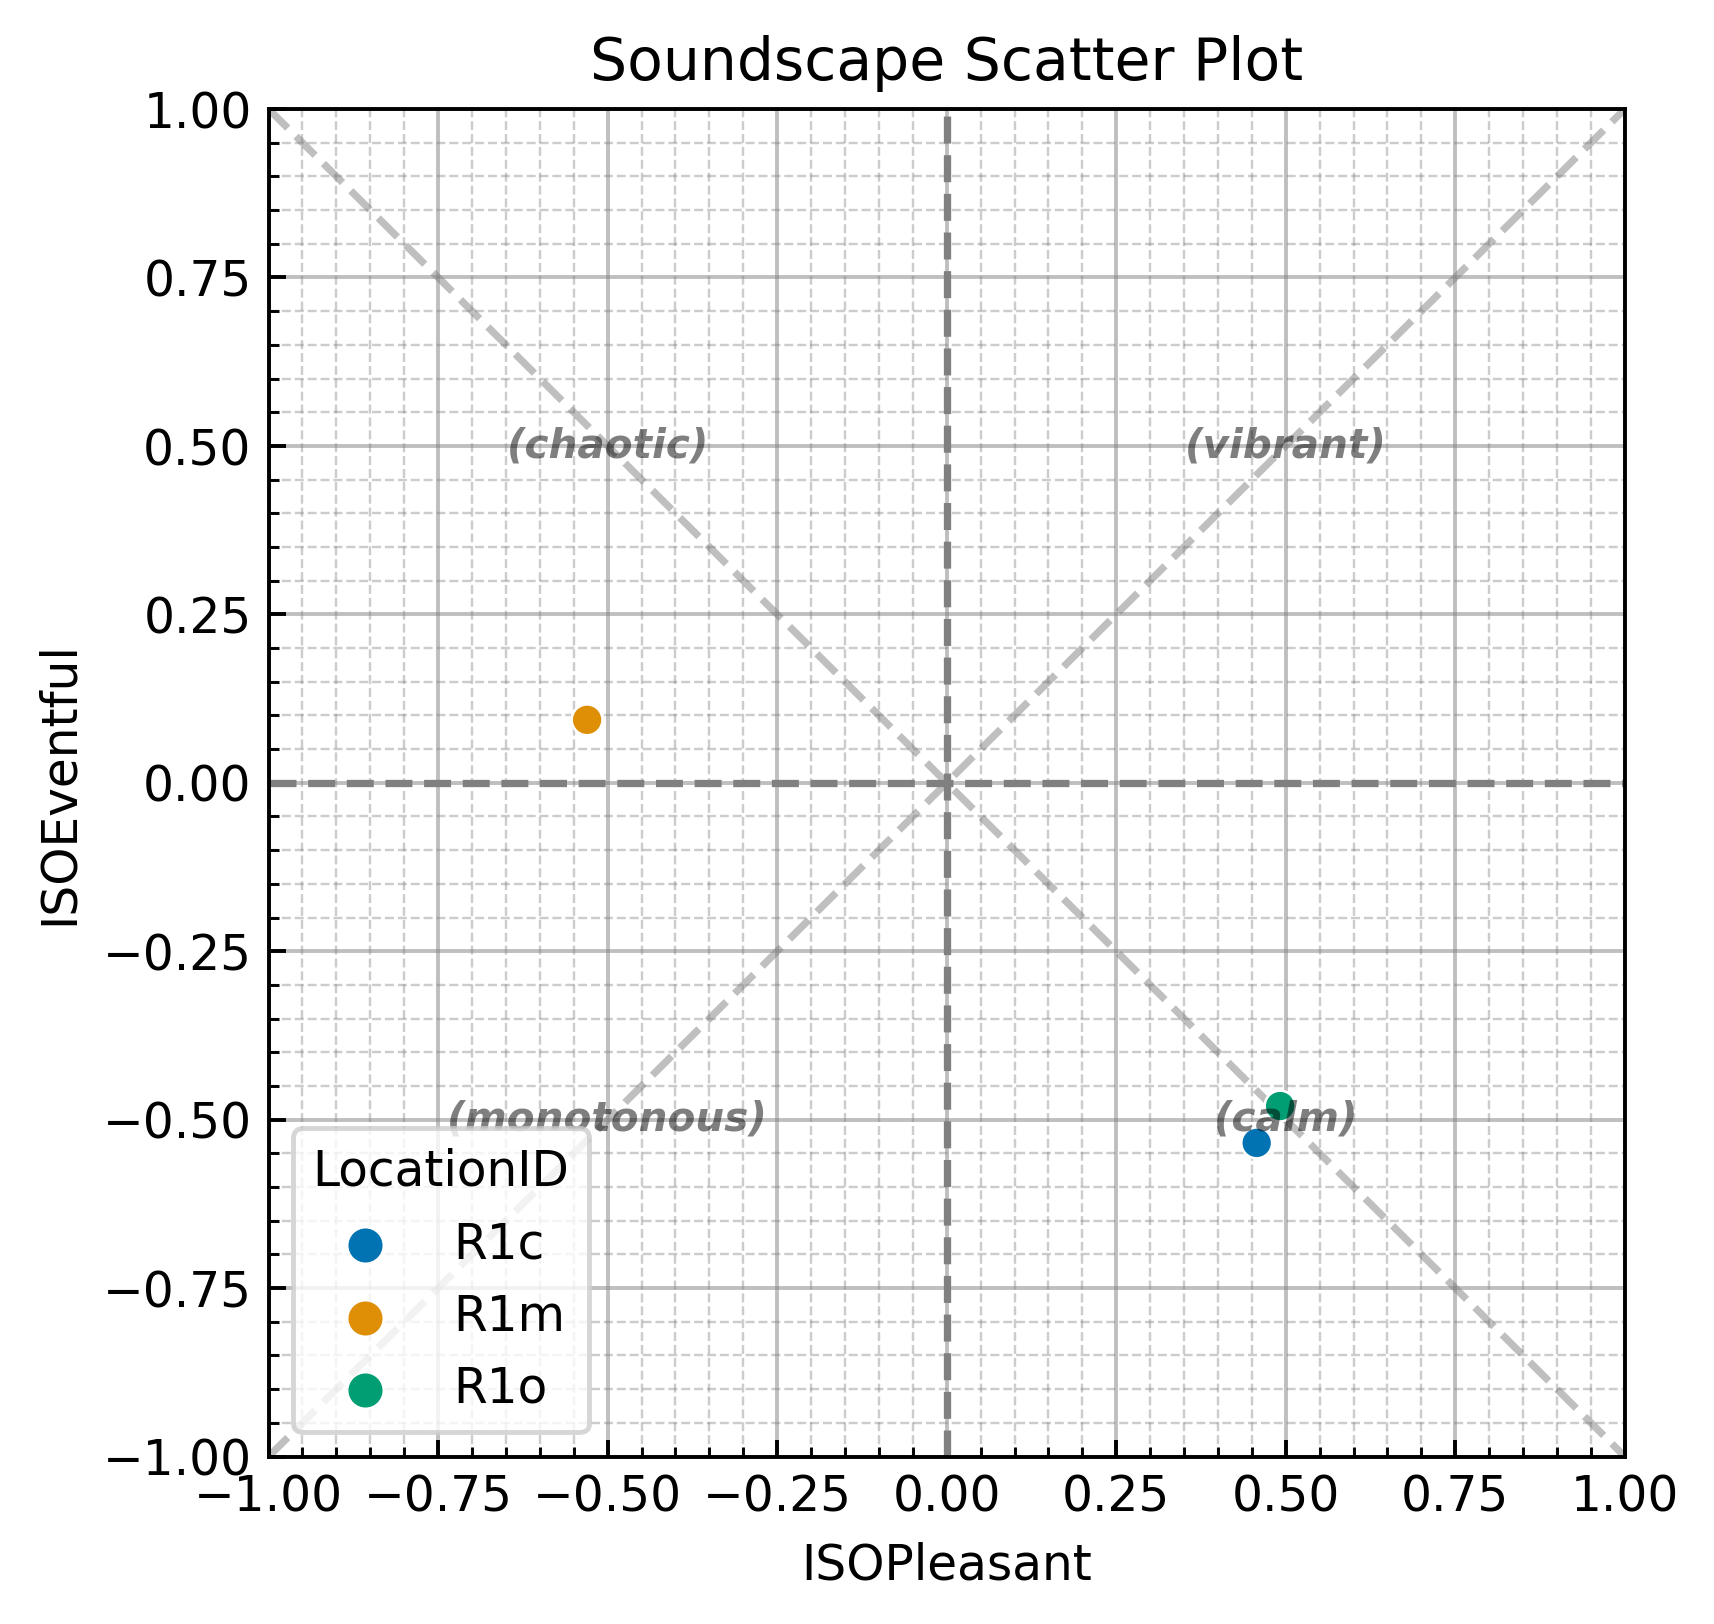

In [11]:
means = df.isd.mean_responses(group="LocationID")
means = means.sspy.add_paq_coords()
means.sspy.scatter(hue="LocationID", s=40, legend=True, diagonal_lines=True,)